In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('Housing.csv')
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
382,3570000,3150,3,1,2,yes,no,yes,no,no,0,no,furnished
416,3395000,3450,3,1,1,yes,no,yes,no,no,2,no,unfurnished
248,4543000,4100,2,2,1,yes,yes,yes,no,no,0,no,semi-furnished
173,5250000,5300,4,2,1,yes,no,no,no,yes,0,yes,unfurnished
127,5880000,6500,3,2,3,yes,no,no,no,yes,0,no,unfurnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
166,5320000,7800,3,1,1,yes,no,yes,no,yes,2,yes,unfurnished
527,2275000,1836,2,1,1,no,no,yes,no,no,0,no,semi-furnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
303,4200000,4500,3,1,1,yes,no,yes,no,no,0,no,furnished


In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
df.isna().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool

### There are no missing values in this data set.

In [5]:
df.duplicated().sum()

0

### There are no duplicate values in this data set.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### There are 6 numerical columns and 7 categorical columns in this data set.We need to convert all categorical value to the numarical values.

In [7]:
df1 = df

### convert 'mainroad' column.

In [8]:
df1['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

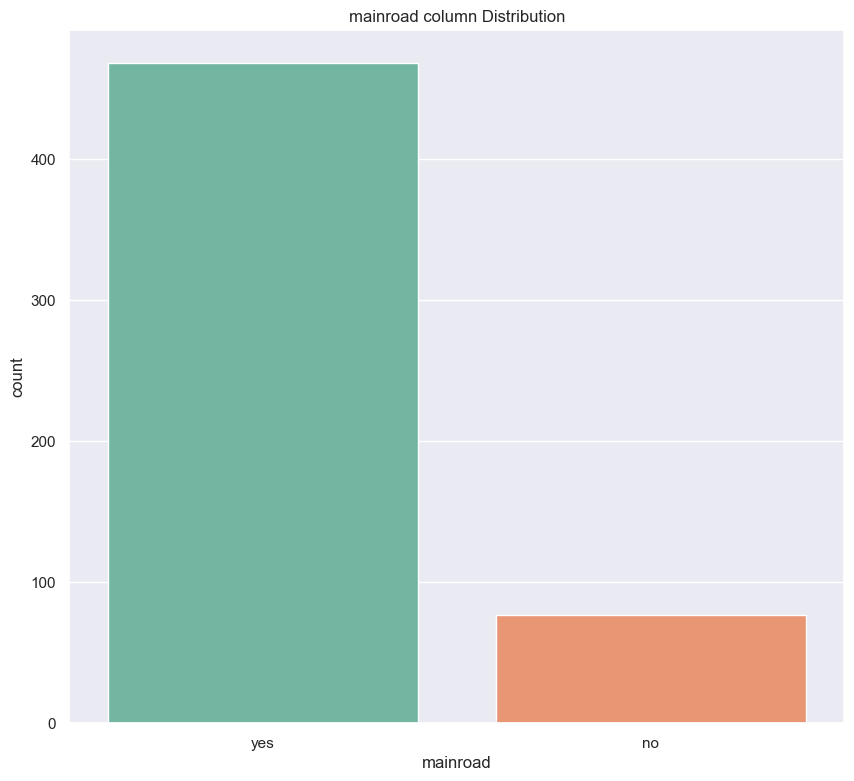

In [9]:
sns.set()
plt.figure(figsize = (10, 9))
sns.countplot(x = 'mainroad', data = df, palette='Set2')
plt.title('mainroad column Distribution')
plt.show()

### covert yes to 1 and no to 0.

In [10]:
df1.replace({'mainroad' : {'yes' : 1, 'no' : 0}}, inplace = True)

### convert 'guestroom' column.

In [11]:
df1['guestroom'].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

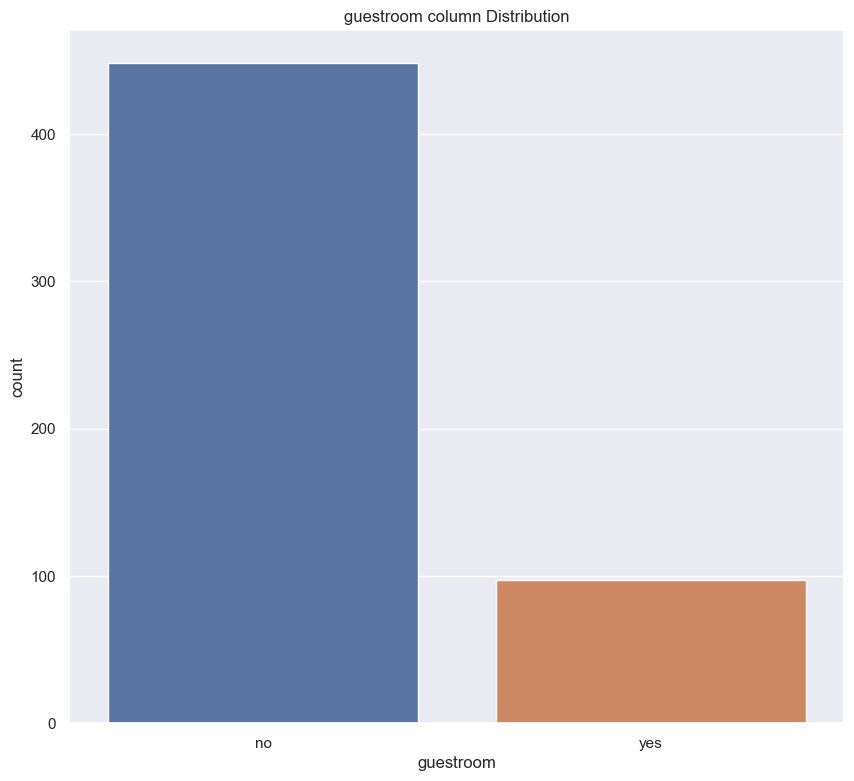

In [12]:
sns.set()
plt.figure(figsize = (10, 9))
sns.countplot(x = 'guestroom', data = df1)
plt.title('guestroom column Distribution')
plt.show()

### covert yes to 1 and no to 0.

In [13]:
df1.replace({'guestroom' : {'no' : 0, 'yes' : 1}}, inplace = True)

### convert 'basement' colums.

In [14]:
df1['basement'].value_counts()

no     354
yes    191
Name: basement, dtype: int64

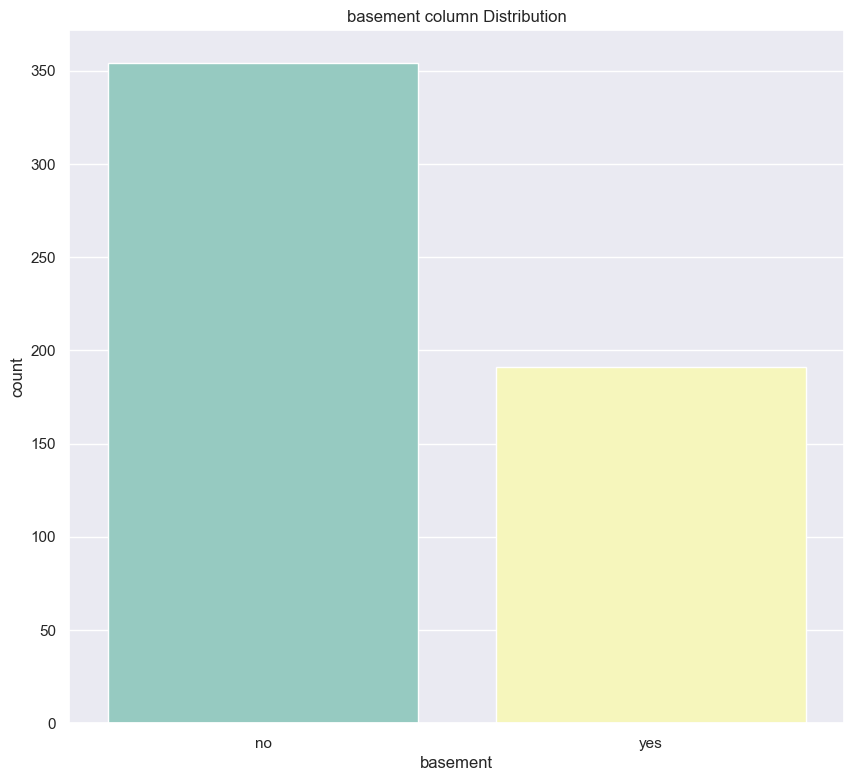

In [15]:
sns.set()
plt.figure(figsize = (10, 9))
sns.countplot(x = 'basement', data = df1, palette='Set3')
plt.title('basement column Distribution')
plt.show()

### convert yes to 1 and no to 0.

In [16]:
df1.replace({'basement' : {'yes'  : 1, 'no' : 0}}, inplace = True)

### convert 'hotwaterheating' column. 

In [17]:
df1['hotwaterheating'].value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

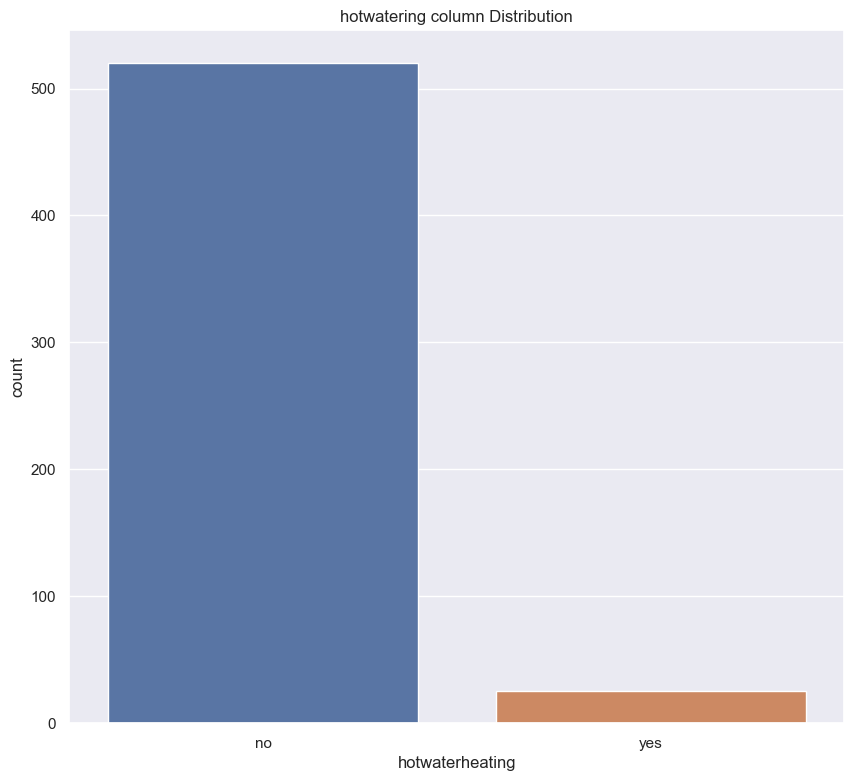

In [18]:
sns.set()
plt.figure(figsize = (10, 9))
sns.countplot(x = 'hotwaterheating', data = df1)
plt.title('hotwatering column Distribution')
plt.show()

### convert yes to 1 and no to 0

In [19]:
df1.replace({'hotwaterheating' : {'yes' : 1, 'no' : 0}}, inplace = True)

### convert 'airconditioning' column.

In [20]:
df1['airconditioning'].value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

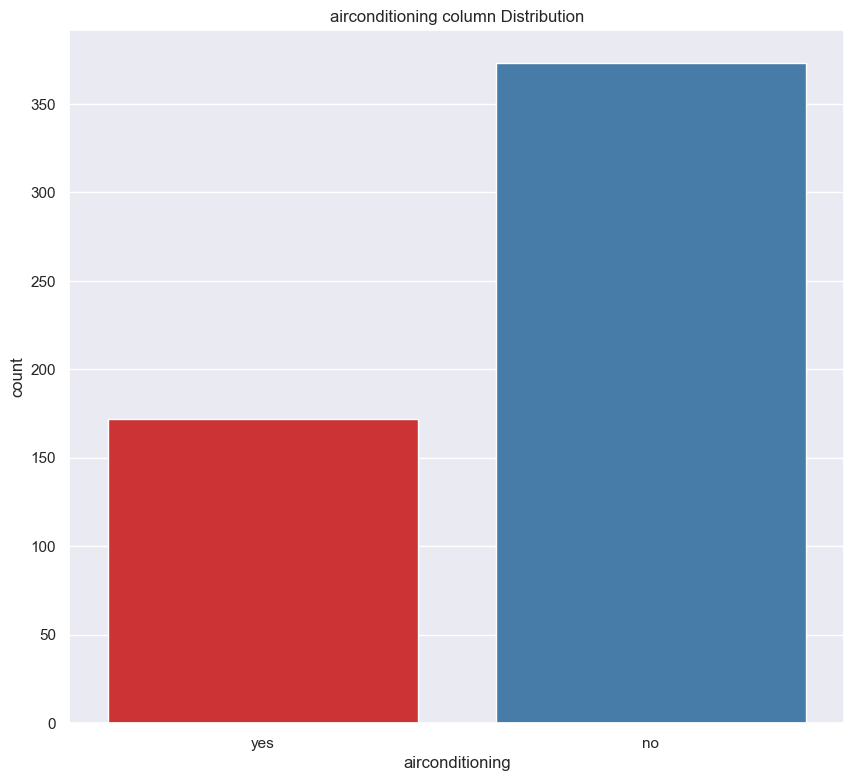

In [21]:
sns.set()
plt.figure(figsize = (10, 9))
sns.countplot(x = 'airconditioning', data = df1, palette='Set1')
plt.title('airconditioning column Distribution')
plt.show()

### convert yes to 1 and no to 0

In [22]:
df1.replace({'airconditioning' : {'yes' : 1, 'no' : 0}}, inplace = True)

### convert 'prefarea' column.

In [23]:
df['prefarea'].value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

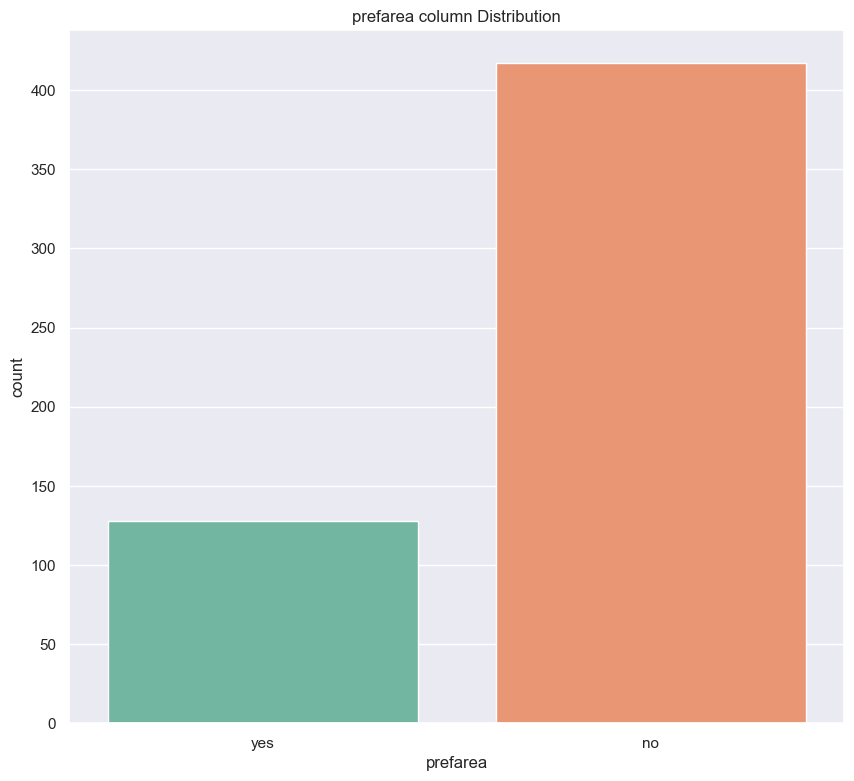

In [24]:
sns.set()
plt.figure(figsize = (10, 9))
sns.countplot(x = 'prefarea', data = df1, palette='Set2')
plt.title('prefarea column Distribution')
plt.show()

### covert yes to 1 and no to 0

In [25]:
df1.replace({'prefarea' : {'yes' : 1, 'no' : 0}}, inplace = True)

### convert 'furnishingstatus' column.

In [26]:
df1['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

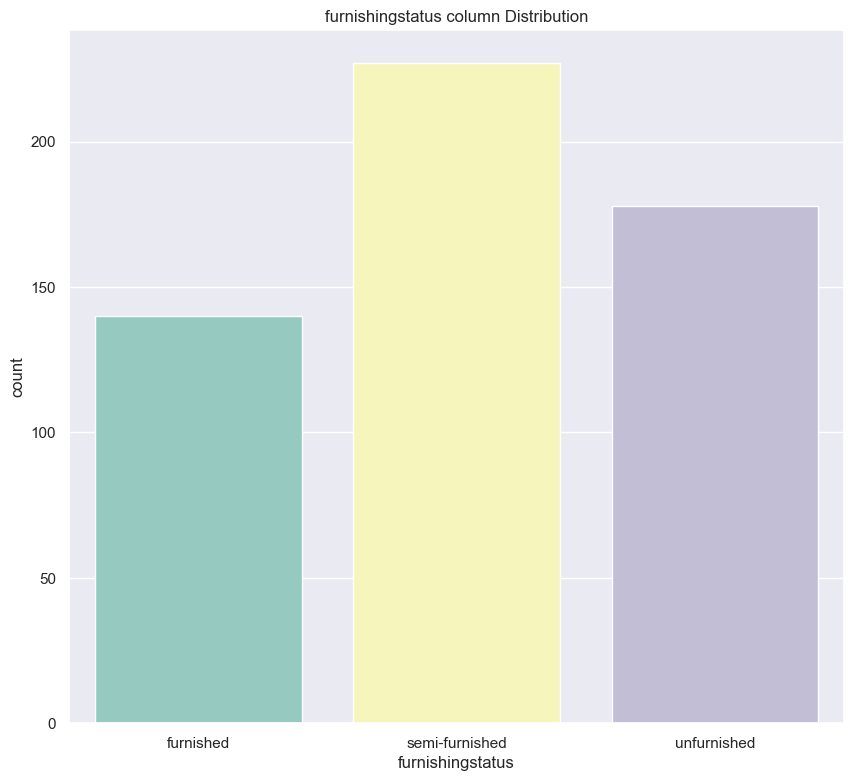

In [27]:
sns.set()
plt.figure(figsize = (10, 9))
sns.countplot(x = 'furnishingstatus', data = df1, palette='Set3')
plt.title('furnishingstatus column Distribution')
plt.show()

### convet furnished to 2, semi-furnished to 1 and unfurnished to 0

In [28]:
df1.replace({'furnishingstatus' : {'furnished' : 2, 'semi-furnished' : 1, 'unfurnished' : 0}}, inplace = True)

In [29]:
df1.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
130,5866000,4800,3,1,1,1,1,1,0,0,0,0,0
404,3493000,4900,3,1,2,0,0,0,0,0,0,0,0
386,3535000,3850,3,1,1,1,0,0,0,0,2,0,0
134,5803000,7000,3,1,1,1,0,1,0,0,2,1,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [30]:
df2 = df1

### Skew and Kurtosis

In [31]:
def beforeBox(x):
    sns.set()
    fig = plt.figure(figsize = (8, 8))
    plt.boxplot(x)
    plt.title('box-plot before transforming')
    plt.show()

In [32]:
def afterBox(x):
    sns.set()
    fig = plt.figure(figsize = (8, 8))
    plt.boxplot(x)
    plt.title('box-plot after transforming')
    plt.show()

### Consider about 'price' column.

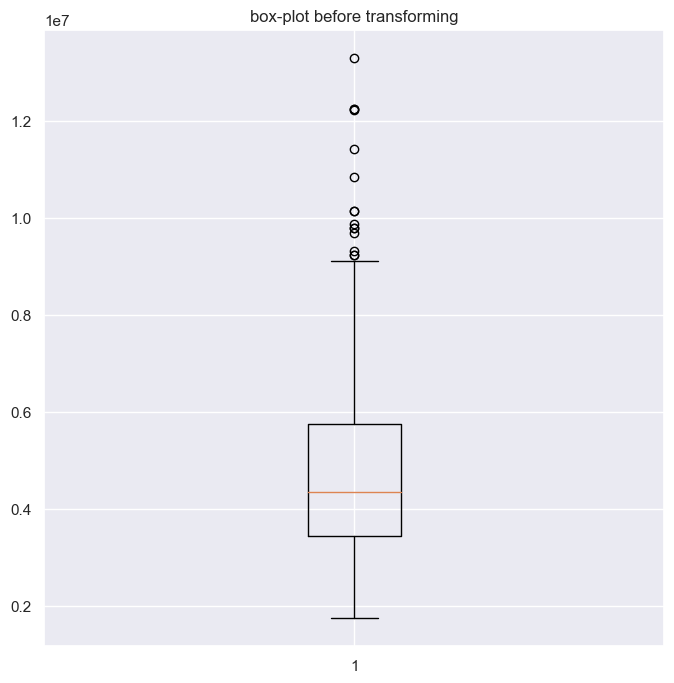

In [33]:
beforeBox(df2.price)

#### There are some outliers in the 'price' column. We have to haddle this values.

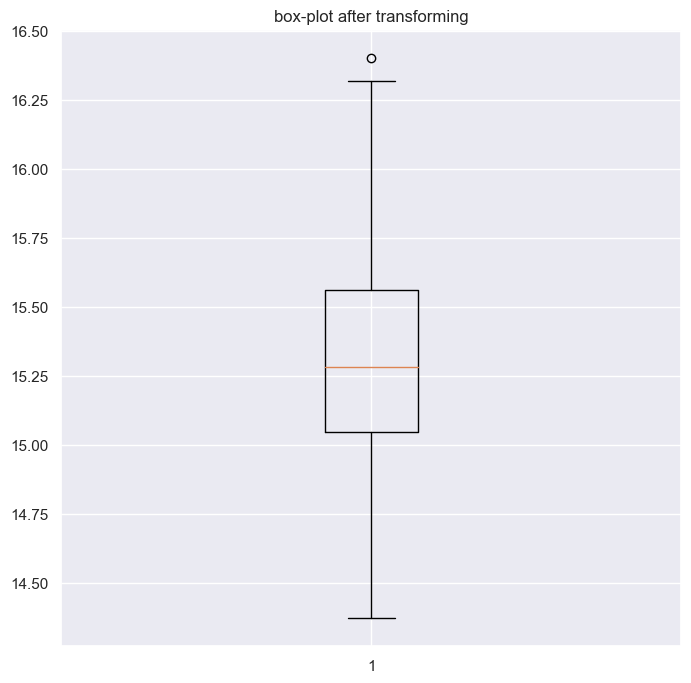

In [34]:
df2['price'] = np.log(df2['price'])

afterBox(df2.price)

### Consider about 'area' column.

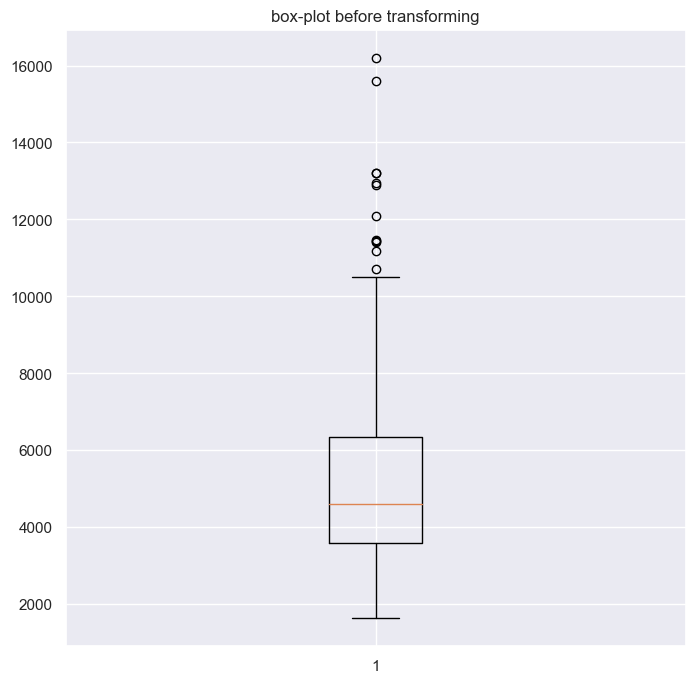

In [35]:
beforeBox(df2.area)

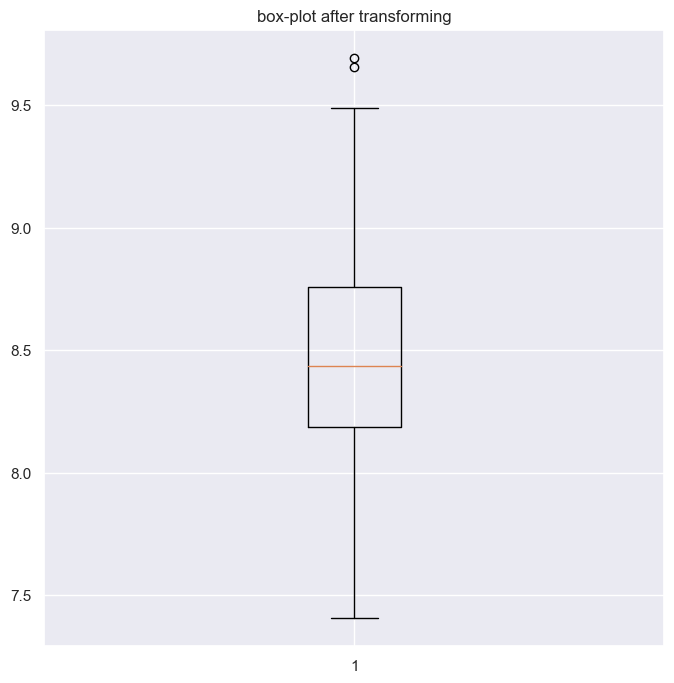

In [36]:
df2['area'] = np.log(df2.area)

afterBox(df2.area)

### Consider about 'bedrooms' column.

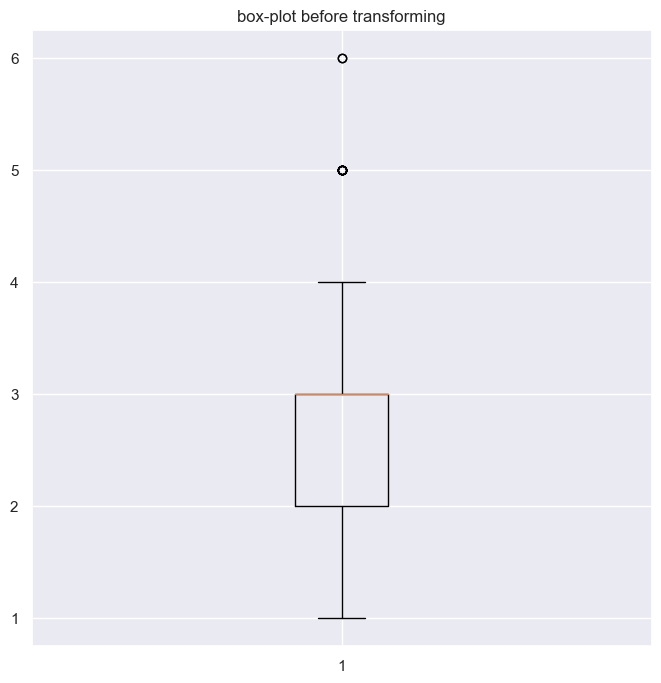

In [37]:
beforeBox(df2.bedrooms)

### Consider about 'bathrooms' column.

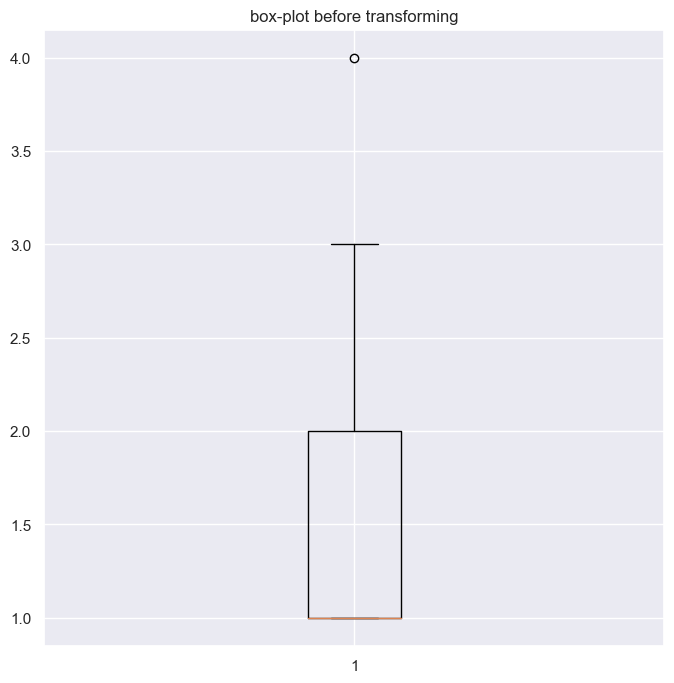

In [38]:
beforeBox(df2.bathrooms)

### Consider about 'stories' column

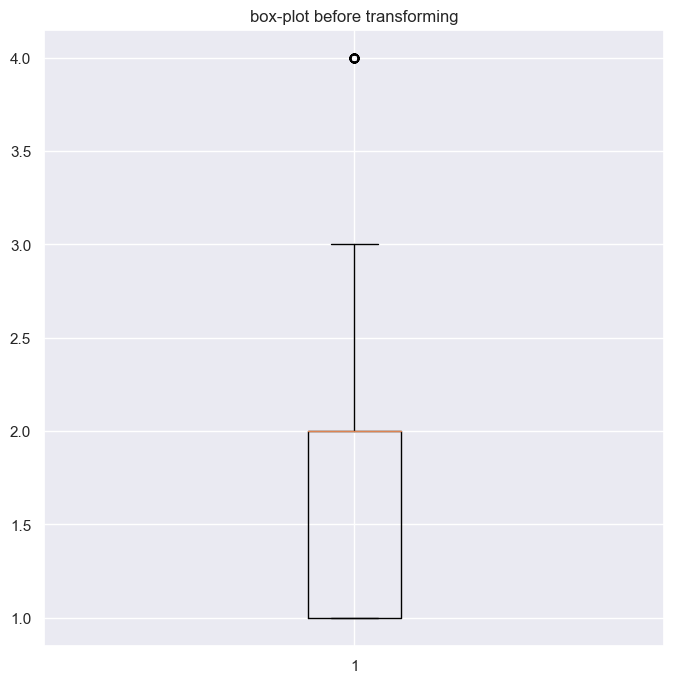

In [39]:
beforeBox(df2.stories)

### Consider about 'parking' column

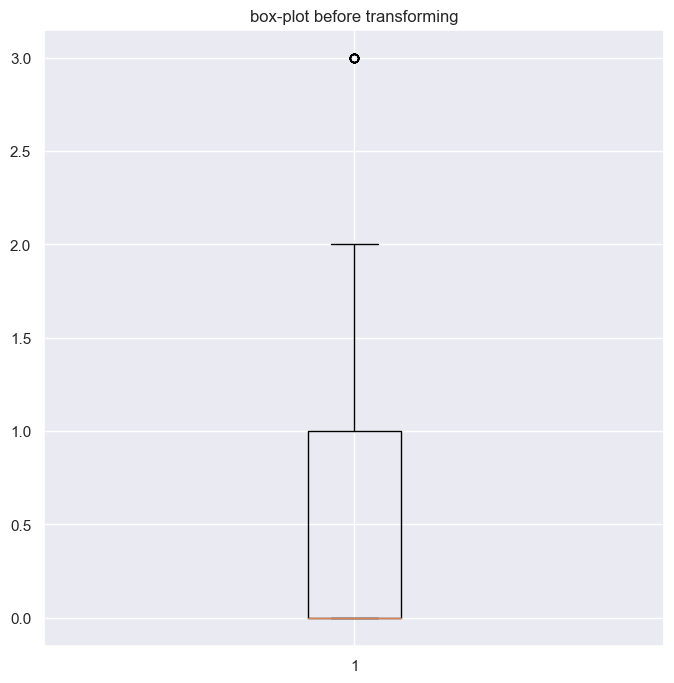

In [40]:
beforeBox(df2.parking)

## There might be few outliers in bedrooms, bathrooms, stories, parking columns but then we cannot say that the values are exact an outlier values.

In [41]:
df2.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
117,15.598902,8.216088,4,1,2,1,1,0,0,1,0,0,2
197,15.416110,7.937375,3,2,2,0,0,1,0,1,1,0,1
515,14.711599,8.074026,3,1,2,1,0,1,0,0,0,0,0
95,15.656060,8.318742,3,2,3,1,0,0,0,1,2,0,1
101,15.644887,8.612503,3,1,3,1,0,0,0,0,1,1,0
349,15.145235,8.480529,3,1,2,1,0,0,0,0,0,0,1
494,14.819812,8.824678,2,1,1,1,0,0,0,0,0,0,0
535,14.557448,8.119696,2,1,1,1,0,0,0,0,1,0,0
1,16.321036,9.100526,4,4,4,1,0,0,0,1,3,0,2
323,15.208035,8.594154,3,1,1,1,0,0,0,0,3,0,1


## Spliting data in to features(area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwatering, airconditioning, parking, prefarea, furnishingstatus) and targets(price)

In [42]:
x = df2.drop(columns = 'price', axis = 1)
x.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,8.911934,4,2,3,1,0,0,0,1,2,1,2
1,9.100526,4,4,4,1,0,0,0,1,3,0,2
2,9.206332,3,2,2,1,0,1,0,0,2,1,1
3,8.922658,4,2,2,1,0,1,0,1,3,1,2
4,8.911934,4,1,2,1,1,1,0,1,2,0,2


In [43]:
y = df2['price']
y.head(5)

0    16.403275
1    16.321036
2    16.321036
3    16.318175
4    16.250001
Name: price, dtype: float64

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 6)

## Train data

In [45]:
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

## Model Evaluating

### R square value 

In [46]:
traning_data_prediction = lr.predict(x_train) 

r2_train = metrics.r2_score(y_train, traning_data_prediction)
print("R square value : ", r2_train)

R square value :  0.6913550493513998


### R square value for test data

In [47]:
test_data_prediction = lr.predict(x_test)

r2_test = metrics.r2_score(y_test, test_data_prediction)
print("R square value for test data : ", r2_test)

R square value for test data :  0.7308965488710351


### Building a predictive system

In [48]:
input_data = (8.911934, 4, 2, 3, 1, 0, 0, 0, 1, 2, 1, 2)
input_array = np.asarray(input_data).reshape(1, -1)
data_prediction = lr.predict(input_array) 
data_prediction

C:\Users\pinil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.96586232])

## Building a pickle file

In [49]:
import pickle
with open('predictor.pickle', 'wb') as file:
    pickle.dump(lr, file)